## Reglas de Asociación

### 1) Descubrimiento de asociaciones

- Búsqueda de patrones frecuentes, asociaciones, correlaciones o estructuras causales entre conjuntos de artículos u objetos (datos) a partir de bases de datos transaccionales, relacionales y conjuntos de datos.


- Búsqueda de secuencias o patrones temporales


- Aplicaciones:
    - Análisis de carritos de compra
    - Diseño de catálogos,...
    - ¿Qué hay en el carrito? corbatas
    - ¿Cómo motivar al cliente a comprar los artículos que es probable que le gusten?


### 2) Reglas de asociación

- Objetivo de los algoritmos de extracción de reglas de asociación:
    - Dada una **base de datos de transacciones**, donde cada transacción es una lista de artículos (comprados por un cliente en una misma visita)
        
    - Encontrar todas las reglas que corelacionen la presencia de un conjunto de artículos con otro conjunto de artículos.
    
    - Ejemplo : 89% de la gente que compra neumáticos y accesorios para el automóvil, también requiere servicios.
    
    
La idea es obtener reglas de tipo:

- Antecedente => Consecuente [soporte, confianza]
- Compra (x , pañales) => compra(x, cerveza) [0.5% , 60%]


- Encontrar todas las reglas X ^ Y => Z con un mínimo de confianza y de soporte

- Soporte (s): La probabilidad de que una transacción cotenga {X ^ Y ^ Z}

- Confianza (c): Probabilidad condicional P( Z | X ^ Y )


### El soporte habitual podría ir entre el 5 y 10 %

Con un **Soporte**:

- Alto => habrá pocas reglas que ocurren con frecuencia (obviedades)
- Bajo => habrá muchas reglas que ocurren raramente ()


Con una **Confianza:**

- Alta => pocas reglas, pero todas **casi ciertas logicamente**

- Baja => muchas reglas, pero muchas de ellas muy **inciertas**

Un ejemplo de **Soporte** sería, dentro de todas las transacciones, el % frecuencia de la familia Corbata

y de **Confianza** sería, dentro del número de transacciones con Corbata, el % de otra Familia (Camisa p.e.)

#### Valores típicos

**Soporte:** 2-10 %

**Confianza** 70-90%

**Lift** hacer caso al lift > 1

### Lift
 ~~~py
    Lift(Burger→Ketchup) = (Confidence (Burger→Ketchup))/(Support (Ketchup))

    Lift(Burger→Ketchup) = 33.3/10
                     = 3.33
 ~~~
Básicamente, Lift nos dice que la probabilidad de comprar Burger y Ketchup juntos es 3.33 veces más que la probabilidad de comprar solo el ketchup. Un Lift de 1 significa que no hay asociación entre los productos A y B. Un Lift de más de 1 significa que los productos A y B tienen más probabilidades de comprarse juntos. Finalmente, un Lift de menos de 1 se refiere al caso en el que es poco probable que dos productos se compren juntos.
 
### 3) El algoritmo APRIORI

- Ecuentra las asociaciones más frecuentes 
- Itera sobre la base de datos hasta que las asociaciones obtenidas no tienen el soporte mínimo.
- Método simple pero robusto
- Salida intuitiva


- Requisitos:
  + No necesita fijar los atributos de los lados derecho (consecuente) e izquierdo (antecedente) de las reglas, pues se generan de manera automática
  + Existen variedades para tratar todo tipo de datos
  + Especificar mínimo soporte
  + Especificar máximo número de reglas.
  
El algortimo busca iterativamente conjuntos frecuentes con cardinalidad 1 hasta k (k-conjunto), y después **usa los conjuntos frecuentes para crear reglas de asociación.**

En el paso clave del descubrimiento de **conjuntos frecuentes**, se basa en el principio "a priori"

- Cualquier subconjunto de un conjunto de artículos frecuente debe ser frecuente 
  
  Ejemplo: si {A B} es un conjunto frecuente, entonces tanto {A} como {B} deberían ser frecuentes
  
Y por el contrario si existe algún conjunto "infrecuente", entonces no hay necesidad de generar sus superconjuntos

In [8]:
import pandas as pd
import pyodbc

#pyodbc
server = 'tcp:190.27.1.13\BI'
database = 'dbHighLife'
username = 'srodriguez'
password = 'Zmadgfv1'

cnxn = pyodbc.connect('DRIVER={ODBC Driver 13 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()


consulta = '''  select Marcas from Apriori_HL where Familias <> '' and Fecha>='20210101' and Fecha <='20211231'   '''

resultado = []


registros = cursor.execute(consulta).fetchall()


In [9]:
print('Registros : ',len(registros))

Registros :  20748


In [10]:
for x in registros:
    resultado.append(x.Marcas.split(","))

In [ ]:
# resultado

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from apyori import apriori

In [12]:
reglas_asociacion = apriori(resultado, min_support=0.005,min_confidence=0.20, min_lift=1,min_length=2)

resultados_asociacion=list(reglas_asociacion)

In [13]:
#Filtramos para solo obtener asociaciones con más de un elemento, pues en los resultados nos arroja a partir de 1
# aunque los resultados de un elemento nos ayudaría a obtener la frecuencia (sporte) de cada producto individualmente

resultados_asociacion = list(filter(lambda x: len(x[0])>1 , resultados_asociacion))

In [14]:
print(len(resultados_asociacion))

16


## Resultados 
- Cada resultado podría tener varias combinaciones con el antecesor y el consecuente siempre y cuando estas cumplan con el mínimo de confianza.


La cantidad de resultados relacionados o derivados pueden verse así:
~~~py
for w in resultados_asociacion:
    print(len(w[2]))
~~~

Así que en un resultado dependiendo de la cantidad de items dentro de su conjunto se asociación pordría darse una multiplicaidad de resultados. 

Estos resultados se encontrarán anidados dentro del tercer elemento de la lista para cada resultado. o sea

- El primer elemento contiene el conjunto de elementos en los resutados

- EL segundo elemento contiene el Soporte del Resultado

- El tercer elemento contiene las estadísticas para cada cobinación de resultados 


Guardaremos todos los resultados en un DataFrame en **Pandas** para su óptima lectura

In [15]:
reg=0
print(resultados_asociacion[reg],'\n\n')

print(list(resultados_asociacion[reg][0]))
print(len(resultados_asociacion[reg][0]),'\n')


print(resultados_asociacion[reg][1],'\n')

print(resultados_asociacion[reg][2])
print(len(resultados_asociacion[reg][2]))

RelationRecord(items=frozenset({'BOGGI', 'HUGO BOSS'}), support=0.014121843069211491, ordered_statistics=[OrderedStatistic(items_base=frozenset({'BOGGI'}), items_add=frozenset({'HUGO BOSS'}), confidence=0.3174431202600217, lift=1.372433811034576)]) 


['BOGGI', 'HUGO BOSS']
2 

0.014121843069211491 

[OrderedStatistic(items_base=frozenset({'BOGGI'}), items_add=frozenset({'HUGO BOSS'}), confidence=0.3174431202600217, lift=1.372433811034576)]
1


In [16]:
resultados = []
antecedente=''
consecuente=''
for res in resultados_asociacion:
    
    for sub in range(len(res[2])):
        #print(res[2][sub],'\n')
        antecedente=""
        consecuente=""
        
        conjunto = ','.join(list(res[0]))
        soporte = res[1]
        antecedente = ','.join(list(res[2][sub][0]))
        consecuente=','.join(list(res[2][sub][1]))
        confianza = res[2][sub][2]
        Lift = res[2][sub][3]
        
        resultados.append(list((conjunto,soporte,antecedente,consecuente,confianza,Lift)))
        #antecedente= list(res[2][sub][0])
        #consecuente = list(res[2][sub][1])
        print('Conjunto : ',conjunto,'\nSoporte : ',res[1],'\n',antecedente, ' => ',consecuente ,'\nConfianza : ',confianza, '\nLift : ',Lift,'\n')
        
        

Conjunto :  BOGGI,HUGO BOSS 
Soporte :  0.014121843069211491 
 BOGGI  =>  HUGO BOSS 
Confianza :  0.3174431202600217 
Lift :  1.372433811034576 

Conjunto :  CALDERONI,CALDERONIB 
Soporte :  0.028099093888567572 
 CALDERONIB  =>  CALDERONI 
Confianza :  0.30175983436853 
Lift :  1.1077340841256653 

Conjunto :  HUGO BOSS,CANALI 
Soporte :  0.006265664160401002 
 CANALI  =>  HUGO BOSS 
Confianza :  0.31862745098039214 
Lift :  1.3775541473101012 

Conjunto :  E.ZEGNA,HUGO BOSS 
Soporte :  0.005976479660690187 
 E.ZEGNA  =>  HUGO BOSS 
Confianza :  0.2525458248472505 
Lift :  1.0918567980685046 

Conjunto :  H.LIFE,HIGHLIFE B 
Soporte :  0.026508579140158087 
 HIGHLIFE B  =>  H.LIFE 
Confianza :  0.5198487712665406 
Lift :  1.2146196290808766 

Conjunto :  H.LIFE,HL SLIM FI 
Soporte :  0.04275110854058223 
 HL SLIM FI  =>  H.LIFE 
Confianza :  0.44350000000000006 
Lift :  1.036231756756757 

Conjunto :  H.LIFE,HL TAILOR 
Soporte :  0.01349527665317139 
 HL TAILOR  =>  H.LIFE 
Confianza :

In [17]:
Asociaciones = pd.DataFrame(resultados,columns=['Conjunto','Soporte','Antecedente','Consecuente','Confianza','Lift'])

In [18]:
Asociaciones

Conjunto   Soporte           Antecedente  \
0                  BOGGI,HUGO BOSS  0.014122                 BOGGI   
1             CALDERONI,CALDERONIB  0.028099            CALDERONIB   
2                 HUGO BOSS,CANALI  0.006266                CANALI   
3                E.ZEGNA,HUGO BOSS  0.005976               E.ZEGNA   
4                H.LIFE,HIGHLIFE B  0.026509            HIGHLIFE B   
5                H.LIFE,HL SLIM FI  0.042751            HL SLIM FI   
6                 H.LIFE,HL TAILOR  0.013495             HL TAILOR   
7                 HL TRENDY,H.LIFE  0.006507             HL TRENDY   
8             HL TAILOR,HL SLIM FI  0.009302             HL TAILOR   
9                Z ZEGNA,HUGO BOSS  0.008049               Z ZEGNA   
10     CALDE UPPE,CALDERONI,H.LIFE  0.006362     CALDE UPPE,H.LIFE   
11     CALDERONI,CALDERONIB,H.LIFE  0.010796     CALDERONIB,H.LIFE   
12  CALDERONI,CALDERONIB,HUGO BOSS  0.007953  CALDERONI,CALDERONIB   
13  CALDERONI,CALDERONIB,HUGO BOSS  0.007953  CALDERONIB,HUGO BOSS   
14     CALDERONI,H.LIFE,HL SLIM FI  0.009447  CALDERONI,HL SLIM FI   
15      CALDERONI,H.LIFE,HUGO BOSS  0.016146      H.LIFE,HUGO BOSS   
16     CALDERONIB,HUGO BOSS,H.LIFE  0.006940     CALDERONIB,H.LIFE   

   Consecuente  Confianza      Lift  
0    HUGO BOSS   0.317443  1.372434  
1    CALDERONI   0.301760  1.107734  
2    HUGO BOSS   0.318627  1.377554  
3    HUGO BOSS   0.252546  1.091857  
4       H.LIFE   0.519849  1.214620  
5       H.LIFE   0.443500  1.036232  
6       H.LIFE   0.450886  1.053488  
7       H.LIFE   0.454545  1.062039  
8   HL SLIM FI   0.310789  3.224126  
9    HUGO BOSS   0.365427  1.579886  
10   CALDERONI   0.279070  1.024441  
11   CALDERONI   0.361290  1.326265  
12   HUGO BOSS   0.283019  1.223604  
13   CALDERONI   0.425258  1.561084  
14      H.LIFE   0.545961  1.275631  
15   CALDERONI   0.327148  1.200933  
16   HUGO BOSS   0.232258  1.004145

In [19]:
import networkx as nx

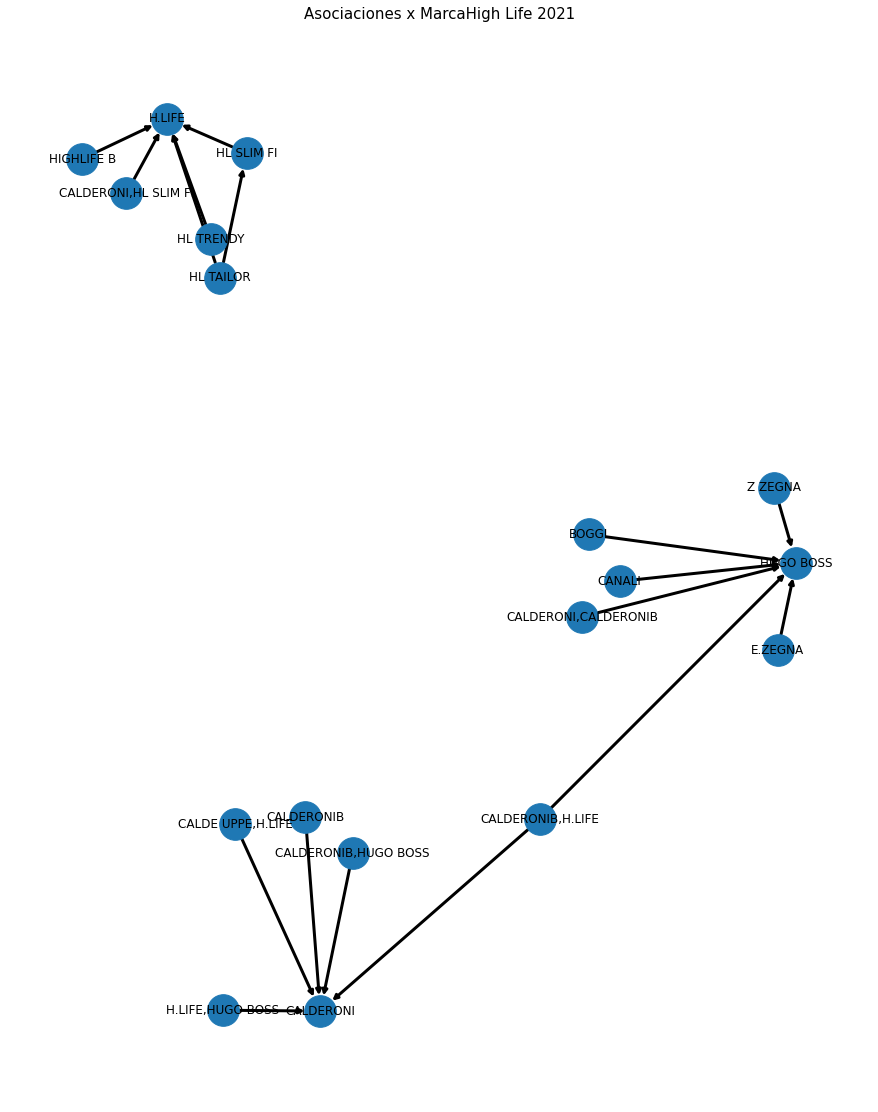

In [20]:
titulo = "Asociaciones x MarcaHigh Life 2021"
G = nx.DiGraph()
plt.figure(figsize=(12,15))

G.add_weighted_edges_from( list((row[2],row[3],row[4])) for row in resultados )

labels = nx.get_edge_attributes(G,'weight')

nx.draw(G, with_labels=True,node_size=1000, width=3)
#nx.draw_networkx_edge_labels(G,edge_labels=[b for a,b in labels.items()])

plt.title(titulo,size=15)

plt.draw()
plt.savefig(titulo+'.pdf')

Asociaciones.to_excel(titulo+'.xlsx', index=False, encoding='utf-8-sig')

plt.show()

In [13]:
resultados

[['CALDERONI,CALDERONIC',
  0.01146048670801146,
  'CALDERONIC',
  'CALDERONI',
  0.28407047824523557,
  1.7755531796381832],
 ['CANALI,HUGO BOSS',
  0.01059006999601059,
  'CANALI',
  'HUGO BOSS',
  0.28410196536291105,
  1.370315133287539],
 ['HL TAILOR,HL SLIM FI',
  0.03783411308163783,
  'HL TAILOR',
  'HL SLIM FI',
  0.3276793567031034,
  1.3954688941980462],
 ['HL SLIM FI,HL TRENDY',
  0.01156928879701157,
  'HL TRENDY',
  'HL SLIM FI',
  0.3737113402061856,
  1.5915026076522343],
 ['SIDI LE CO,HL TAILOR',
  0.007173684401407174,
  'SIDI LE CO',
  'HL TAILOR',
  0.20582726326742976,
  1.7826596086420532],
 ['Z ZEGNA,HUGO BOSS',
  0.012954702063612955,
  'Z ZEGNA',
  'HUGO BOSS',
  0.3696957151728421,
  1.7831613116993974],
 ['CALDE UPPE,HL SLIM FI,H.LIFE',
  0.006506364922206506,
  'CALDE UPPE,HL SLIM FI',
  'H.LIFE',
  0.46070878274268107,
  1.2074753114486088],
 ['CALDERONI,HL SLIM FI,H.LIFE',
  0.01383962572081384,
  'CALDERONI,H.LIFE',
  'HL SLIM FI',
  0.30232926636032326,
